In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import fix_yahoo_finance as yf

/usr/local/lib/python3.10/dist-packages/fix_yahoo_finance/__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [ ]:
pip install fix_yahoo_finance

[*********************100%%**********************]  1 of 1 completed


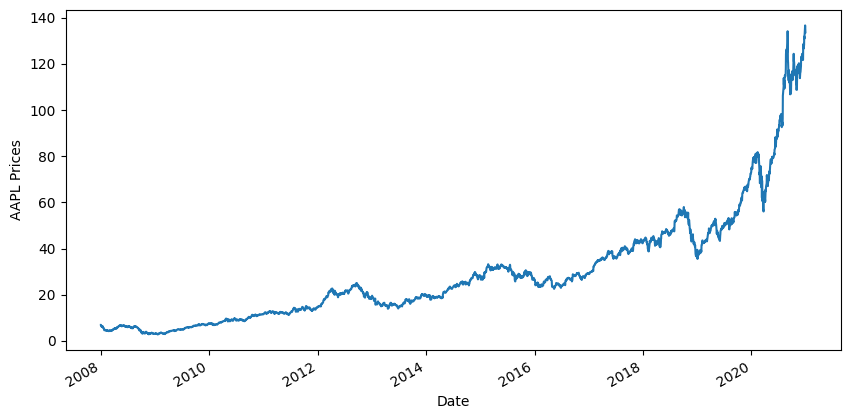

In [ ]:
Df = yf.download('AAPL','2008-01-01','2020-12-31')
Df=Df[['Close']]
Df= Df.dropna()
Df.Close.plot(figsize=(10,5))
plt.ylabel("AAPL Prices")
plt.show()

In [ ]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean()
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean()
Df= Df.dropna()
X = Df[['S_3','S_9']]
X.head()

,S_3,S_9
Date,,
2008-01-15,6.303452,6.458730
2008-01-16,6.196548,6.356349
2008-01-17,6.041191,6.216310
2008-01-18,5.828214,6.140278
2008-01-22,5.736786,6.075675


In [ ]:
y = Df['Close']
y.head()

,Close
Date,
2008-01-15,6.037143
2008-01-16,5.701429
2008-01-17,5.746071
2008-01-18,5.762857
2008-01-22,5.558571


In [ ]:
t=.8
t = int(t*len(Df))
# Train dataset
X_train = X[:t]
y_train = y[:t]
# Test dataset
X_test = X[t:]
y_test = y[t:]

In [ ]:
linear = LinearRegression().fit(X_train,y_train)

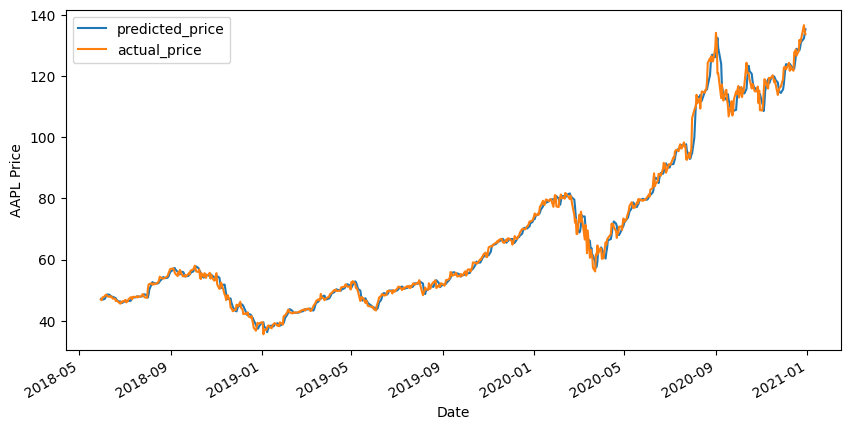

In [ ]:
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel("AAPL Price")
plt.show()

In [ ]:
r2_score = linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2_score))

99.42

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#(MAE)
mae = mean_absolute_error(y_test, predicted_price)
print(f"Mean Absolute Error (MAE): {mae}")

#(MSE)
mse = mean_squared_error(y_test, predicted_price)
print(f"Mean Squared Error (MSE): {mse}")

#(RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

#(R²)
r2 = r2_score(y_test, predicted_price)
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 1.2731375612161868
Mean Squared Error (MSE): 3.9271248997318233
Root Mean Squared Error (RMSE): 1.9816974793675808
R-squared (R²): 0.9941832424695579
